In [28]:
# csvファイルを読み込んで1次元配列を作る。[1st_fbg,2nd_fbg,1st_sig,2nd_sig,1st_bbg,2nd_bbg]
# 1次元配列から2列の2次元配列を作成。ヘッダは[ch1,ch2]\
# |ch1|ch2|\
# |1st_fbg|2nd_fbg|\
# |1st_sig|2nd_sig|\
# |1st_bbg|2nd_bbg|
# 
# 3n行目の値と3n+2行目の値の平均をとって3n+1行目の値から引く(n=0,1,2,3...)
# その値を新しいリストに詰める。
import glob as glob
import pandas as pd 
import numpy as np 
import csv
from pathlib import Path

#************* Def of variables *************
runTime = '2023-12-12-203553' # 再現性チェック　LED&PD
nchannel =2
rawDataFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/logger_data/{runTime}/*csv'
outFileName = f'output_logger2signal{runTime}.csv'
outFilePath = f'/Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/30cmFiberAnalysis/output_LoggerCSVs2FiberSignal/Reproducibility/{outFileName}'
csv_files = sorted(glob.glob(f'{rawDataFilePath}'))

#************* Subtract and Reshape *************

# make 1D array from csv
data_1dim = np.empty(0)

for file in csv_files:
		mydf = pd.read_csv(file
											,encoding="Shift-JIS"
											,skiprows=22)
		mean_ch1,mean_ch2 = mydf.iloc[:,3:5].mean(numeric_only=True)
		data_1dim = np.append(data_1dim, [mean_ch1,mean_ch2])

nrows = len(data_1dim) // nchannel
data_2dim = data_1dim.reshape(nrows,2)
#print("data_2dim=\n",data_2dim)

# ループの回数（n）を決定
n = data_2dim.shape[0] // 3
print("\nRunLength:",n)
foutputNDarray = np.empty(0)

# 3n行目と3n+2行目の平均を計算して3n+1行目から引いて、ndarray型のoutputdataに詰める。
for i in range(n):
		row1 = data_2dim[3 * i]
		row2 = data_2dim[3 * i + 2]
		average = (row1 + row2) / 2
		foutputNDarray = np.append(foutputNDarray,data_2dim[3 * i + 1]-average)
		#print(data_2dim[3*i+1])
outputdata = foutputNDarray.reshape(-1,nchannel)
print(outputdata)

#データフレームからCSVに書き出す。
df = pd.DataFrame(outputdata
									,columns=['Ch1 [V]','Ch2 [V]']
									)

df.to_csv(f'{outFilePath}'
					,index=False
					)
print("\noutput: ",f'{outFilePath}')
#****************************************************


RunLength: 10
[[3.50203732 3.8168825 ]
 [3.77433277 3.76060976]
 [3.54089935 3.72065152]
 [3.6423     3.7513    ]
 [3.71302909 3.68678606]
 [3.52160695 3.65403119]
 [3.60069435 3.72105306]
 [3.61946711 3.58670325]
 [3.61526    3.72842   ]
 [3.65838    3.76508   ]]

output:  /Users/dik1017/Documents/my_work/Laboratory/work_log/vscode_jupiter_notebook/pynb/30cmFiberAnalysis/output_LoggerCSVs2FiberSignal/Reproducibility/output_logger2signal2023-12-12-203553.csv


In [1]:
print('\n*****************'
			,'\n','runtime:',runTime
			,'\n*****************'
			)
outdf = pd.read_csv(outFilePath)
#print(outdf['Ch1 [V]'].mean(numeric_only=True))
labels = ['Ch1 [V]', 'Ch2 [V]']
for ichannel in range(nchannel):
	stdev = outdf[labels[ichannel]].std(numeric_only=True,ddof=1)
	mean = outdf[labels[ichannel]].mean(numeric_only=True)
	print(f'\n{labels[ichannel]}mean=',mean)
	print(f'\n{labels[ichannel]}stdev=',stdev)
	print(f'\n{labels[ichannel]}stdev/mean=',stdev/mean)


NameError: name 'runTime' is not defined

## カップリングの再現性計算：ヒストグラム

    Ch1 [V]   Ch2 [V]
0  3.502037  3.816882
1  3.774333  3.760610
2  3.540899  3.720652
3  3.642300  3.751300
4  3.713029  3.686786
5  3.521607  3.654031
6  3.600694  3.721053
7  3.619467  3.586703
8  3.615260  3.728420
9  3.658380  3.765080
errRatio =  [0.02342564 0.01731794]
MeanErrRato =  0.020371788255615517


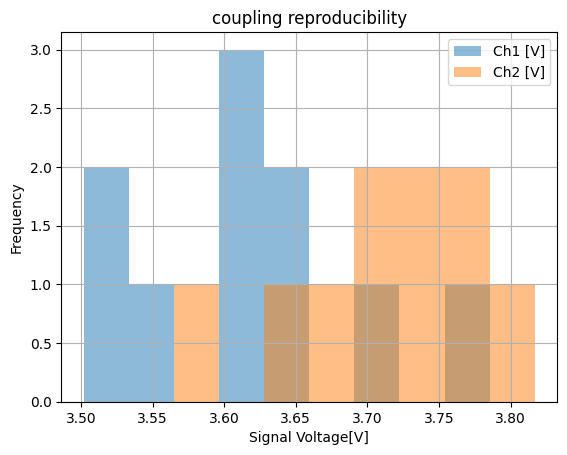

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

ax = plt.axes()
df = pd.read_csv(f'./output_LoggerCSVs2FiberSignal/couplingReproducibility/output_logger2signal2023-12-12-203553.csv')
print(df)
df.plot(title='coupling reproducibility'
				,grid=True
				,legend=True
				,alpha=0.5
				,kind='hist'
				,ax =ax
				)
ax.set_xlabel("Signal Voltage[V]")
mean = df.mean().values
stdev = df.std(ddof=1).values
errRatio = stdev/mean
print("errRatio = ", errRatio)
print("MeanErrRato = ", errRatio.mean())